In [110]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, accuracy_score,f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from nltk.corpus import names
from collections import defaultdict
import os,re
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, roc_auc_score, confusion_matrix

%matplotlib inline


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
newsgroups = fetch_20newsgroups(subset='train') #remove=('headers', 'footers', 'quotes'))
data = pd.Series(newsgroups.data)
df = pd.DataFrame(data)
df.columns = ['text'] + df.columns.tolist()[1:]
df['target'] = pd.Series(newsgroups.target)
df['target_names'] = pd.Series(newsgroups.target_names)
df

,text,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,alt.atheism
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.graphics
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.os.ms-windows.misc
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.sys.ibm.pc.hardware
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,comp.sys.mac.hardware
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,NaN
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,NaN
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,NaN
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,NaN


In [3]:
df1 = pd.read_json ("https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json")
df1.columns = ['text','target','target_names']
df1

,text,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,comp.sys.mac.hardware
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics


In [4]:
print('target labels the same: ',(df['target'] == df1['target']).all())
print('text the same: ',(df['text'] == df1['text']).all())
print('target names the same: ',(df['target_names'] == df1['target_names']).all())

target labels the same:  True
text the same:  True
target names the same:  False


In [5]:
target_name_dict = df1[['target','target_names']].drop_duplicates().set_index('target_names')['target'].sort_values().to_dict()
target_name_dict

{'alt.atheism': 0,
 'comp.graphics': 1,
 'comp.os.ms-windows.misc': 2,
 'comp.sys.ibm.pc.hardware': 3,
 'comp.sys.mac.hardware': 4,
 'comp.windows.x': 5,
 'misc.forsale': 6,
 'rec.autos': 7,
 'rec.motorcycles': 8,
 'rec.sport.baseball': 9,
 'rec.sport.hockey': 10,
 'sci.crypt': 11,
 'sci.electronics': 12,
 'sci.med': 13,
 'sci.space': 14,
 'soc.religion.christian': 15,
 'talk.politics.guns': 16,
 'talk.politics.mideast': 17,
 'talk.politics.misc': 18,
 'talk.religion.misc': 19}

In [6]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data = pd.Series(newsgroups.data)
df = pd.DataFrame(data)
df.columns = ['text'] + df.columns.tolist()[1:]
df['target'] = pd.Series(newsgroups.target)
df

,text,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


In [7]:
print('shape of dataframe: ', df.shape)
print('number of target variables: ',df.target.nunique())
print('null target variables: ', df.target.isna().any())
print('null text: ',df.text.isna().any())

shape of dataframe:  (18846, 2)
number of target variables:  20
null target variables:  False
null text:  False


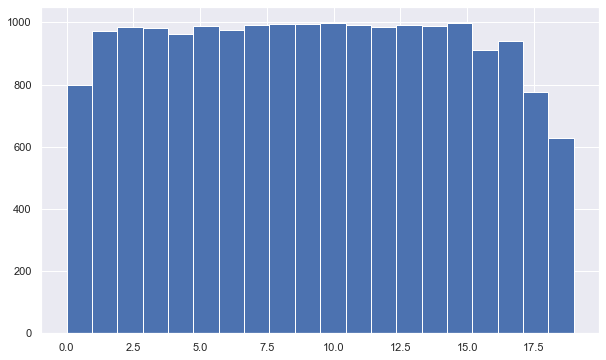

In [8]:
sns.set(rc={'figure.figsize':(10,6)})
df['target'].hist(bins=df.target.nunique())

In [9]:
df

,text,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


In [10]:
#remove emails
df['text'] = df['text'].apply(lambda row: re.sub(r"\S*@\S*\s?","",row))

#remove single quote marks
df['text'] = df['text'].apply(lambda row: re.sub(r"\'","",row))

#make all text lower case
df['text'] = df['text'].str.lower()

#remove numerics
df['text'] = df['text'].apply(lambda row: re.sub(r"\d+","",row))

#remove words with fewer than 3 characters
df['text'] = df['text'].apply(lambda row: re.sub(r'\b\w{1,2}\b', '',row))

#remove extra spaces
df['text'] = df['text'].apply(lambda row: re.sub(r"\s+"," ",row))

df

,text,target
0,sure some bashers pens fans are pretty confus...,10
1,brother the market for high-performance video...,3
2,finally you said what you dream about. medite...,17
3,think! its the scsi card doing the dma transf...,3
4,) have old jasmine drive which cannot use with...,4
...,...,...
18841,> from: (david nye) > neurology > consultation...,13
18842,not isolated ground recepticles (usually unus...,12
18843,"just installed - cpu clone motherboard, and t...",3
18844,"wouldnt this require hyper-sphere. -space, po...",1


In [11]:
df.isna().any()

text      False
target    False
dtype: bool

In [12]:
#instatiate tokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

#tokenize test
df['tokenized_text'] = df.apply(lambda row: tokenizer.tokenize(row['text']),axis=1)

#define stop words
stop_words=set(stopwords.words("english"))

#remove stop words
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])

#instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

#lemmatize text
df['lemmatized'] = df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
df.lemmatized = df.lemmatized.apply(lambda x: " ".join(x) )

df.sample(5)

,text,target,tokenized_text,lemmatized
16746,the complete set the adventures buck rogers fo...,6,"[complete, set, adventures, buck, rogers, fors...",complete set adventure buck rogers forsale mak...
7858,"have promovie spectrum, seems work very nicel...",3,"[promovie, spectrum, seems, work, nicely, vide...",promovie spectrum seems work nicely video wind...
832,,0,[],
1866,sorry once again bother those you this newsgr...,13,"[sorry, bother, newsgroup, suggestions, might,...",sorry bother newsgroup suggestion might find s...
7642,the white house office the press secretary ___...,18,"[white, house, office, press, secretary, immed...",white house office press secretary immediate r...


In [13]:
df

,text,target,tokenized_text,lemmatized
0,sure some bashers pens fans are pretty confus...,10,"[sure, bashers, pens, fans, pretty, confused, ...",sure bashers pen fan pretty confused lack kind...
1,brother the market for high-performance video...,3,"[brother, market, high, performance, video, ca...",brother market high performance video card sup...
2,finally you said what you dream about. medite...,17,"[finally, said, dream, mediterranean, new, are...",finally said dream mediterranean new area grea...
3,think! its the scsi card doing the dma transf...,3,"[think, scsi, card, dma, transfers, disks, scs...",think scsi card dma transfer disk scsi card dm...
4,) have old jasmine drive which cannot use with...,4,"[old, jasmine, drive, cannot, use, new, system...",old jasmine drive cannot use new system unders...
...,...,...,...,...
18841,> from: (david nye) > neurology > consultation...,13,"[david, nye, neurology, consultation, cheaper,...",david nye neurology consultation cheaper scan ...
18842,not isolated ground recepticles (usually unus...,12,"[isolated, ground, recepticles, usually, unusu...",isolated ground recepticles usually unusual co...
18843,"just installed - cpu clone motherboard, and t...",3,"[installed, cpu, clone, motherboard, tried, mo...",installed cpu clone motherboard tried mounting...
18844,"wouldnt this require hyper-sphere. -space, po...",1,"[wouldnt, require, hyper, sphere, space, point...",wouldnt require hyper sphere space point speci...


In [14]:
df.tokenized_text.isna().any()

False

In [15]:
df.rename(columns={'lemmatized':'preprocessed_text'},inplace=True)

df

,text,target,tokenized_text,preprocessed_text
0,sure some bashers pens fans are pretty confus...,10,"[sure, bashers, pens, fans, pretty, confused, ...",sure bashers pen fan pretty confused lack kind...
1,brother the market for high-performance video...,3,"[brother, market, high, performance, video, ca...",brother market high performance video card sup...
2,finally you said what you dream about. medite...,17,"[finally, said, dream, mediterranean, new, are...",finally said dream mediterranean new area grea...
3,think! its the scsi card doing the dma transf...,3,"[think, scsi, card, dma, transfers, disks, scs...",think scsi card dma transfer disk scsi card dm...
4,) have old jasmine drive which cannot use with...,4,"[old, jasmine, drive, cannot, use, new, system...",old jasmine drive cannot use new system unders...
...,...,...,...,...
18841,> from: (david nye) > neurology > consultation...,13,"[david, nye, neurology, consultation, cheaper,...",david nye neurology consultation cheaper scan ...
18842,not isolated ground recepticles (usually unus...,12,"[isolated, ground, recepticles, usually, unusu...",isolated ground recepticles usually unusual co...
18843,"just installed - cpu clone motherboard, and t...",3,"[installed, cpu, clone, motherboard, tried, mo...",installed cpu clone motherboard tried mounting...
18844,"wouldnt this require hyper-sphere. -space, po...",1,"[wouldnt, require, hyper, sphere, space, point...",wouldnt require hyper sphere space point speci...


In [16]:
#replace empty strings with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [18]:
#drop nan cells
df.dropna(inplace=True)

In [19]:
df

,text,target,tokenized_text,preprocessed_text
0,sure some bashers pens fans are pretty confus...,10,"[sure, bashers, pens, fans, pretty, confused, ...",sure bashers pen fan pretty confused lack kind...
1,brother the market for high-performance video...,3,"[brother, market, high, performance, video, ca...",brother market high performance video card sup...
2,finally you said what you dream about. medite...,17,"[finally, said, dream, mediterranean, new, are...",finally said dream mediterranean new area grea...
3,think! its the scsi card doing the dma transf...,3,"[think, scsi, card, dma, transfers, disks, scs...",think scsi card dma transfer disk scsi card dm...
4,) have old jasmine drive which cannot use with...,4,"[old, jasmine, drive, cannot, use, new, system...",old jasmine drive cannot use new system unders...
...,...,...,...,...
18841,> from: (david nye) > neurology > consultation...,13,"[david, nye, neurology, consultation, cheaper,...",david nye neurology consultation cheaper scan ...
18842,not isolated ground recepticles (usually unus...,12,"[isolated, ground, recepticles, usually, unusu...",isolated ground recepticles usually unusual co...
18843,"just installed - cpu clone motherboard, and t...",3,"[installed, cpu, clone, motherboard, tried, mo...",installed cpu clone motherboard tried mounting...
18844,"wouldnt this require hyper-sphere. -space, po...",1,"[wouldnt, require, hyper, sphere, space, point...",wouldnt require hyper sphere space point speci...


In [94]:
#train test validation split

X,y = df.preprocessed_text,df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [95]:
train_df = X_train.to_frame().merge(y_train.to_frame(),left_index=True,right_index=True)
val_df = X_val.to_frame().merge(y_val.to_frame(),left_index=True,right_index=True)
test_df = X_test.to_frame().merge(y_test.to_frame(),left_index=True,right_index=True)

In [96]:
train_df.to_csv(r'Data/train.csv', index = False)
val_df.to_csv(r'Data/val.csv', index = False)
test_df.to_csv(r'Data/test.csv', index = False)

In [102]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
val = pd.read_csv('Data/val.csv')
train

,preprocessed_text,target
0,australia car enthusiast australia particularl...,7
1,nothing wrong felix problem didnt dino hard en...,10
2,meg meg sec scsi drive cost since quadra mac a...,3
3,suppress secretion prolactin useful case galac...,13
4,still imho rank time greatest blunder mention ...,10
...,...,...
10282,commanded strong courageous terrified discoura...,15
10283,university wanting buy couple server provide e...,3
10284,looking lead source good window meta file conv...,1
10285,count allan lockridge opinion sale,16


In [ ]:
accuracy = make_scorer(accuracy_score)
precision = make_scorer(precision_score, average='macro')
recall =  make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')
scoring={'accuracy':accuracy,'precision':precision,'recall':recall,'f1':f1}

scoring.items()

In [ ]:
def multiclass_confusion_matrix(true, pred):
    cm = confusion_matrix(true,pred)
    df_cm = pd.DataFrame(cm,
                         index = [f'TRUE_{target}' for target in list(range(0,20))],
                         columns = [f'PRED_{target}' for target in list(range(0,20))])
    sns.heatmap(df_cm, annot=True,annot_kws={'size':10},cmap='Blues',fmt='g')

In [ ]:
# plt.figure(figsize=(10,10))
multiclass_confusion_matrix(y_val,pred_val)
print(f'{accuracy_score.__name__}: {accuracy_score(y_val, pred_val):.4f}')
for scorer in [precision_score,recall_score,f1_score]:
    name = scorer.__name__
    print(f'{name}: {scorer(y_val, pred_val,average="micro"):.4f}')

In [25]:
X_train

10747    australia car enthusiast australia particularl...
6190     nothing wrong felix problem didnt dino hard en...
12339    meg meg sec scsi drive cost since quadra mac a...
16797    suppress secretion prolactin useful case galac...
14755    still imho rank time greatest blunder mention ...
                               ...                        
7165     commanded strong courageous terrified discoura...
12707    university wanting buy couple server provide e...
2444     looking lead source good window meta file conv...
18721                   count allan lockridge opinion sale
13310    actually thats based nhls history game statsti...
Name: preprocessed_text, Length: 10287, dtype: object

In [26]:
vect = CountVectorizer()

In [27]:
vect_x_train = vect.fit_transform(X_train)

In [28]:
vect_x_train

<10287x62646 sparse matrix of type '<class 'numpy.int64'>'
	with 662913 stored elements in Compressed Sparse Row format>

In [29]:
tfidf = TfidfVectorizer()

In [30]:
tf_vect_xtrain = tfidf(vect_x_train)

TypeError: 'TfidfVectorizer' object is not callable

In [31]:
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path

Using TensorFlow backend.


In [36]:
# 20 news groups
num_labels = 20
vocab_size = 5000
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
 
x_nn_train = tokenizer.texts_to_matrix(X_train, mode='tfidf')
x_nn_val = tokenizer.texts_to_matrix(X_val, mode='tfidf')
x_nn_test = tokenizer.texts_to_matrix(X_test, mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(y_train)
y_nn_train = encoder.transform(y_train)
y_nn_val = encoder.transform(y_val)
y_nn_test = encoder.transform(y_test)

In [37]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_nn_train, y_nn_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               2560512   
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)               

In [38]:

score = model.evaluate(x_nn_val, y_nn_val,
                       batch_size=batch_size, verbose=1)
 
print('Test accuracy:', score[1])
 
text_labels = encoder.classes_
 
for i in range(10):
    prediction = model.predict(np.array([x_nn_val[i]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    print(test_files_names.iloc[i])
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label)

3430/3430 [==============================] - 1s 255us/step
Test accuracy: 0.6778425574302673


NameError: name 'test_files_names' is not defined

In [98]:
tfidf = TfidfVectorizer(min_df=10)
# train_tfidf = tfidf.fit_transform(X_train)

In [99]:
                    
tfidf_train_sparse = tfidf.fit_transform(train.preprocessed_text)
tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), 
                        columns=tfidf.get_feature_names())

tfidf_train_df.head()

,aaa,aaron,ab,abandon,abandoned,abc,abiding,ability,able,abolish,...,youve,yugoslavia,yup,yzerman,zealand,zero,zionist,zip,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088768,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
X_train.shape

(10287,)

In [106]:
def run_log_reg(train_features, test_features, y_train, y_test,  alpha = 1e-4, confusion = False, return_f1 = False, verbose = True):
    metrics = np.zeros(5)
    for _ in range(10):
        log_reg = SGDClassifier(loss = 'log', alpha = alpha, n_jobs = -1, penalty = 'l2')
        log_reg.fit(train_features, y_train)
        y_test_prob = log_reg.predict_proba(test_features)[:,1]
        metrics += print_model_metrics(y_test, y_test_prob, confusion = confusion, verbose = False, return_metrics = True)
    metrics /=10
    if verbose:
        print('F1: {:.3f} | Pr: {:.3f} | Re: {:.3f} | AUC: {:.3f} | Accuracy: {:.3f} \n'.format(*metrics))
    if return_f1:
        return metrics[0]
    return log_reg

In [114]:
def print_model_metrics(y_test, y_test_prob, confusion = False, verbose = True, return_metrics = False):

    precision, recall, threshold = precision_recall_curve(y_test, y_test_prob, pos_label = 1)
    
    #Find the threshold value that gives the best F1 Score
    best_f1_index =np.argmax([calc_f1(p_r) for p_r in zip(precision, recall)])
    best_threshold, best_precision, best_recall = threshold[best_f1_index], precision[best_f1_index], recall[best_f1_index]
    
    # Calulcate predictions based on the threshold value
    y_test_pred = np.where(y_test_prob > best_threshold, 1, 0)
    
    # Calculate all metrics
    f1 = f1_score(y_test, y_test_pred, pos_label = 1, average = 'micro')
    roc_auc = roc_auc_score(y_test, y_test_prob)
    acc = accuracy_score(y_test, y_test_pred)
    
    
    if confusion:
        # Calculate and Display the confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)

        plt.title('Confusion Matrix')
        sns.set(font_scale=1.0) #for label size
        sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = ['No Clickbait', 'Clickbait'], yticklabels = ['No Clickbait', 'Clickbait'], annot_kws={"size": 14}, cmap = 'Blues')# font size

        plt.xlabel('Truth')
        plt.ylabel('Prediction')
        
    if verbose:
        print('F1: {:.3f} | Pr: {:.3f} | Re: {:.3f} | AUC: {:.3f} | Accuracy: {:.3f} \n'.format(f1, best_precision, best_recall, roc_auc, acc))
    
    if return_metrics:
        return np.array([f1, best_precision, best_recall, roc_auc, acc])

In [112]:
def calc_f1(p_and_r):
    p, r = p_and_r
    return (2*p*r)/(p+r)

In [116]:
# We'll use Average Glove here 
from tqdm import tqdm_notebook
from nltk import word_tokenize
from pymagnitude import *
glove = Magnitude("./vectors/glove.6B.100d.magnitude")
def avg_glove(df):
    vectors = []
    for title in tqdm_notebook(df.title.values):
        vectors.append(np.average(glove.query(word_tokenize(title)), axis = 0))
    return np.array(vectors)


RuntimeError: The path to the Magnitude file at './vectors/glove.6B.100d.magnitude' could not be found. Also failed to find a valid remote model at the following URL: http://magnitude.plasticity.ai/./vectors/glove.6B.100d.magnitude